In [5]:
import numpy as np
import matplotlib.pyplot as plt
import BoundaryLayerToolbox as blt
from netCDF4 import Dataset as nc
%matplotlib inline

In [2]:
coyoacan = blt.region()

In [24]:
tlalpan = blt.region()
blt.read_region(tlalpan, "Datos/delegaciones_cdmx/tlalpan.xy")

In [3]:
blt.read_region(coyoacan, "Datos/delegaciones_cdmx/coyoacan.xy")

In [11]:
wrf = nc("Datos/wrfout_d01_2012-05-30_00:00:00.nc", 'r')

In [18]:
xlat = wrf.variables['XLAT']
xlong = wrf.variables['XLONG']
relieve = wrf.variables['HGT']

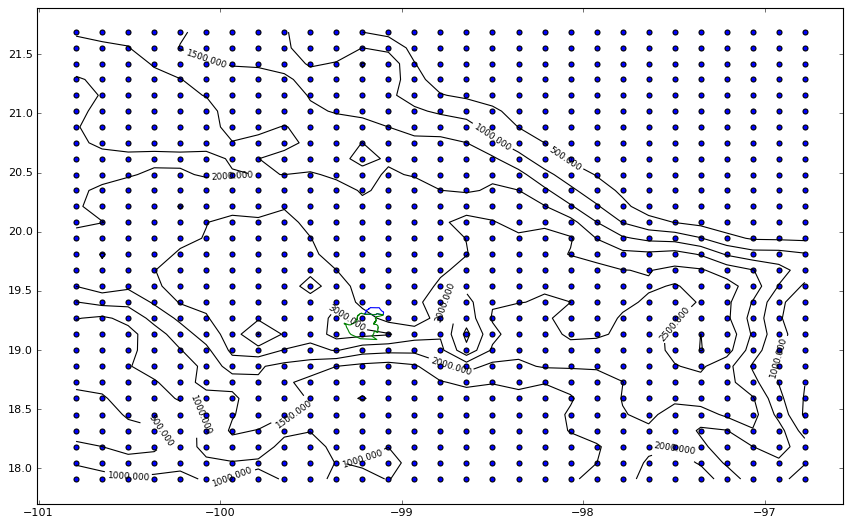

In [43]:
fig = plt.figure(figsize=(13,8))
Cs = plt.contour(xlong[0,:,:], xlat[0,:, :], relieve[0, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8) 
plt.plot(coyoacan.lon, coyoacan.lat)
plt.plot(tlalpan.lon, tlalpan.lat)
plt.scatter(xlong[0,:,:], xlat[0,:,:])

In [17]:
xlat.shape

(97, 29, 29)

In [40]:
def in_region(region, x_long, x_lat):
    nx = []
    ny = []
    for i in range(0,29):
        for j in range(0,29):
            if blt.in_or_out(region, x_long[i,j], x_lat[i,j]) == True:
                nx.append(i)
                ny.append(j)
    return nx, ny

In [29]:
nx

[9, 10]

In [30]:
ny

[11, 11]

In [31]:
xlat[0,nx[0], ny[0]]

19.134148

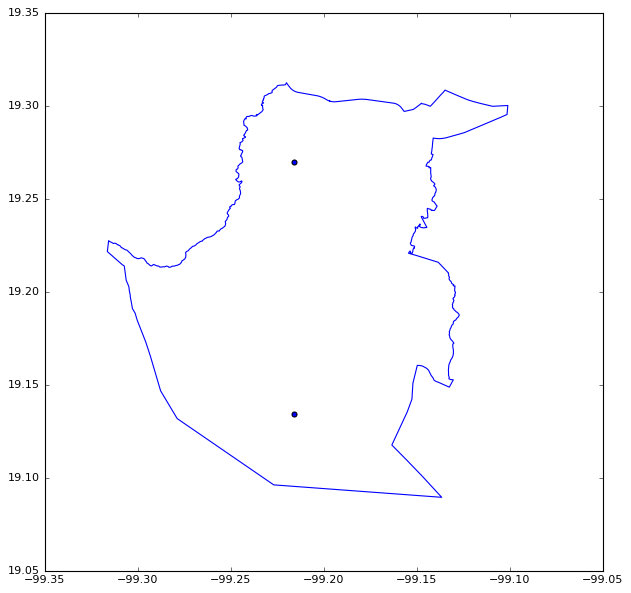

In [34]:
fig = plt.figure(figsize=(9,9))
plt.plot(tlalpan.lon, tlalpan.lat)
plt.scatter(xlong[0,nx[0], ny[0]], xlat[0,nx[0], ny[0]])
plt.scatter(xlong[0,nx[1], ny[1]], xlat[0,nx[1], ny[1]])

In [41]:
in_region(coyoacan, xlong[0,:,:], xlat[0,:,:])

([], [])